In [3]:
%matplotlib inline
from mnist import MNIST
def load_dataset(s="data"):
    mndata = MNIST('./%s/'%s)
    X_train, labels_train = map(np.array, mndata.load_training())
    X_test, labels_test = map(np.array, mndata.load_testing())
    X_train = X_train/255.0
    X_test = X_test/255.0
    return (X_train, labels_train), (X_test, labels_test)

In [4]:
(X_train, labels_train), (X_test, labels_test) = load_dataset()
(_,_), (X_test, labels_test) = load_dataset("testdata")

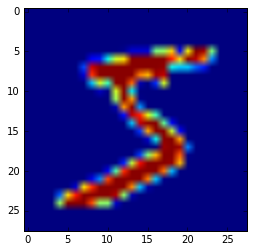

In [3]:
plt.imshow(X_train[0].reshape(28,28))

In [24]:
from scipy.spatial import distance
from scipy.ndimage import interpolation

def moments(image):
    c0,c1 = np.mgrid[:image.shape[0],:image.shape[1]]
    m0 = np.sum(c0*image)/np.sum(image)
    m1 = np.sum(c1*image)/np.sum(image)
    m00 = np.sum((c0-m0)**2*image)/np.sum(image)
    m11 = np.sum((c1-m1)**2*image)/np.sum(image)
    m01 = np.sum((c0-m0)*(c1-m1)*image)/np.sum(image)
    print(m00)
    return np.array([m0,m1]),np.array([[m00,m01],[m01,m11]])

In [27]:
def deskew(image):
    c,v = moments(image)
    alpha = v[0,1]/v[0,0]
    print(v)
    affine = np.array([[1,0],[alpha,1]])
    ocenter = np.array(image.shape)/2.0
    offset = c-np.dot(affine,ocenter)
    return interpolation.affine_transform(image,affine,offset=offset)

42.6000272892
[[ 42.60002729  -9.90490526]
 [ -9.90490526  16.06811906]]


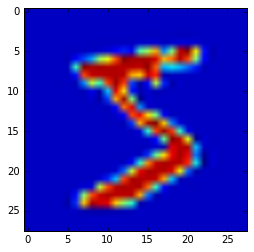

In [28]:
newim = deskew(X_train[0].reshape(28,28))
plt.imshow(newim)

In [1]:
import numpy as np
from scipy.ndimage.interpolation import map_coordinates
from scipy.ndimage.filters import gaussian_filter

def elastic_transform(image, alpha, sigma, random_state=None):
    """Elastic deformation of images as described in [Simard2003]_.
    .. [Simard2003] Simard, Steinkraus and Platt, "Best Practices for
       Convolutional Neural Networks applied to Visual Document Analysis", in
       Proc. of the International Conference on Document Analysis and
       Recognition, 2003.
    """
    assert len(image.shape)==2

    if random_state is None:
        random_state = np.random.RandomState(None)

    shape = image.shape

    dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha

    x, y = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), indexing='ij')
    indices = np.reshape(x+dx, (-1, 1)), np.reshape(y+dy, (-1, 1))
    
    return map_coordinates(image, indices, order=1).reshape(shape)

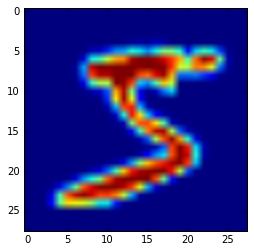

In [18]:
newim2 = elastic_transform(X_train[0].reshape(28,28),36,6)
plt.imshow(newim2)